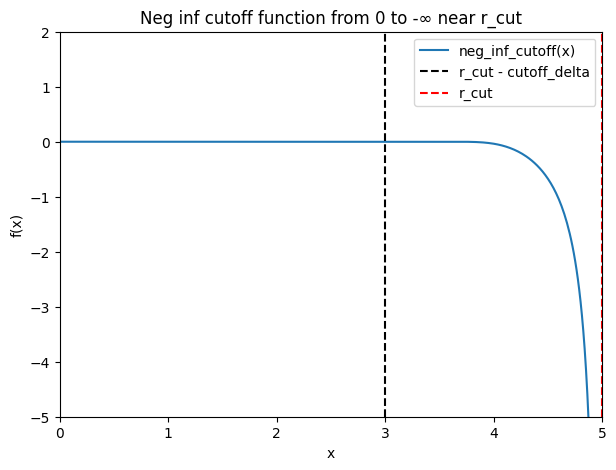

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cutoff_neg_inf(grid, r_cut, cutoff_delta):
    """
    Return a infinitelly differentiable function f(x) on [0, r_cut) such that:
      - f(x) = 0 for x <= r_cut - cutoff_delta
      - f(x) --> -inf as x --> r_cut^-
    and is piecewise defined with a smooth drop near r_cut.
    
    Parameters
    ----------
    grid : 1D numpy array
        The points at which f is evaluated.
    r_cut : float
        The right endpoint (not inclusive) at which we want f --> -inf.
    cutoff_delta : float
        The width of the 'transition region' in which f drops from 0 to -inf.
    
    Returns
    -------
    fvals : 1D numpy array
        The values of the smoothly cutoff function at the points in `grid`.
    """
    fvals = np.zeros_like(grid)

    
    mask = (grid > r_cut - cutoff_delta) & (grid < r_cut)
    x_sub = grid[mask]
    # Compute y in (0,1)
    y = (x_sub - (r_cut - cutoff_delta)) / cutoff_delta
    
   
    numerator = np.exp(-1.0 / (y**2))
    denominator = (1.0 - y)
    
    frac = -numerator / denominator
    
    fvals[mask] = frac
    
    return fvals


r_cut = 5.0
cutoff_delta = 2


x = np.linspace(0, r_cut, 400, endpoint=False)
f_x = cutoff_neg_inf(x, r_cut, cutoff_delta)


plt.figure(figsize=(7,5))
plt.plot(x, f_x, label='neg_inf_cutoff(x)')


plt.axvline(r_cut - cutoff_delta, color='k', linestyle='--', label='r_cut - cutoff_delta')
plt.axvline(r_cut, color='r', linestyle='--', label='r_cut')

plt.ylim([-5, 2])
plt.xlim([0, r_cut])

plt.title("Neg inf cutoff function from 0 to -∞ near r_cut")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


In [11]:
import torch
from torch.nn.functional import scaled_dot_product_attention

def pet_attention(features, n_heads):
    ''' features shape: [batch_size, max_neighbors, d_model]
    '''
    batch_size, max_neighbors, d_model = features.shape
    if d_model % n_heads != 0:
        raise ValueError('d_model should be divisible by n_heads')

    head_dim = d_model // n_heads
     
    #shape becomes [batch_size, max_neighbors, n_heads, head_dim]
    features = features.reshape(batch_size, max_neighbors, n_heads, head_dim) 
    
    #shape becomes [batch_size, n_heads, max_neighbors, head_dim]
    features = features.permute(0, 2, 1, 3) 



features = torch.randn(100, 20, 128)
d_model = 4
                                
pet_attention(features, d_model)